# SEABORN - INTRO

- SEABORN is built on top of MATPLOTLIB just like PANDAS is built on top of NUMPY
- Therefore, they are pretty similar, Seaborn just gives us more options to format the plots in terms of colors, data labels, ...

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Install and Import Seaborn

In [1]:
# pip install seaborn
import seaborn as sns

2. Filter location and drop Nan values from the salary column

In [6]:
# Only get data analyst jobs in the US
df_DA_US = df[
    (df['job_title_short']=="Data Analyst") &
    (df['job_country']=="United States")
    ].copy()
# Drop NaN Values from the 'salary_year_avg' column for plotting
df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

df_DA_US.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.00,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.00,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.00,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.00,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.00,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
1587,Data Analyst,Sr Data Analyst,"Long Beach, CA",via Indeed,Full-time,False,"California, United States",2023-02-16 13:00:47,False,True,United States,year,89111.75,NaN,Molina Healthcare,[excel],{'analyst_tools': ['excel']}
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.00,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.00,NaN,Acrisure,"[shell, sql, azure, databricks, linux]","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.00,NaN,Forsta,"[php, python, express]","{'programming': ['php', 'python'], 'webframewo..."
2401,Data Analyst,Data Analytics- Auto Intern,"Dublin, CA",via LinkedIn,Internship,False,"California, United States",2023-12-27 13:01:14,False,False,United States,year,35000.00,NaN,Epicor,[go],{'programming': ['go']}


3. Recreate the plot that have been created in the previous section.

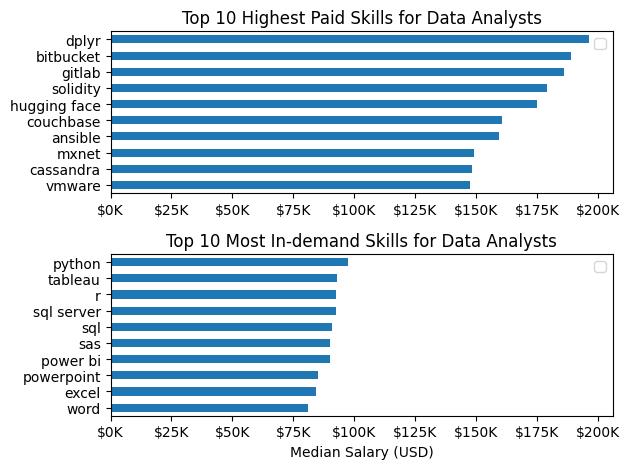

In [9]:
# explode the job_skills column
df_DA_US = df_DA_US.explode('job_skills')
# Create 2 new df for two different sub-plots
df_DA_US_pivot = df_DA_US.groupby(by ='job_skills').agg(
    count = ('job_skills','size'),
    median = ('salary_year_avg','median')

)
df_DA_US_top_pay = df_DA_US_pivot.sort_values(by='median', ascending=False).head(10)

df_DA_US_skills = df_DA_US_pivot.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


# create the plot
fig, ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(
    kind = "barh",
    y= 'median',
    ax = ax[0]
)
ax[0].invert_yaxis() 
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')

#--> instead of using invert_yaxis, we can do [::-1]
df_DA_US_skills[::-1].plot(
    kind = "barh",
    y= 'median',
    ax = ax[1]
)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].legend('')


fig.tight_layout()

4. Create the same plot with Seaborn

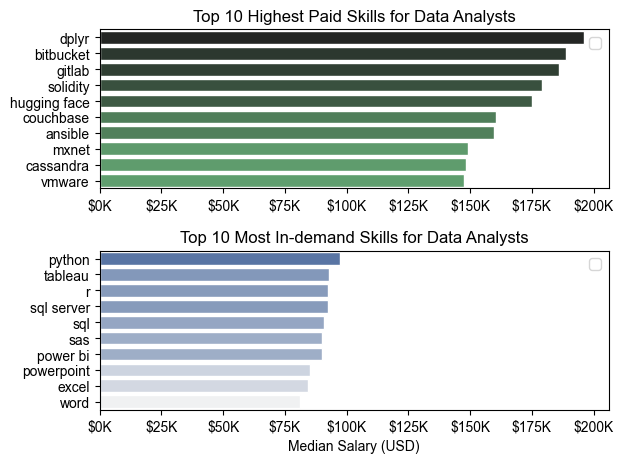

In [16]:
fig, ax = plt.subplots(2,1)
# # Matplotlib version
# df_DA_US_top_pay[::-1].plot(
#     kind = "barh",
#     y= 'median',
#     ax = ax[0]
# ) 

# Set the theme for the plot

sns.set_theme(style= 'ticks')

# Seaborn version
sns.barplot(
    data = df_DA_US_top_pay,
    x= 'median',
    y = df_DA_US_top_pay.index,
    ax= ax[0],
    hue = 'median',
    palette = 'dark:g_r' # add '_r' to reverse the order of sequential colors 
    
    )
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')

# # Matplotlib version
# df_DA_US_skills[::-1].plot(
#     kind = "barh",
#     y= 'median',
#     ax = ax[1]
# )

# Seaborn version
sns.barplot(
    data = df_DA_US_skills,
    x = 'median',
    y = df_DA_US_skills.index,
    ax = ax[1],
    hue = 'median',
    palette = 'light:b'
)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].legend('')


fig.tight_layout()

--> It works like a charm babyyyy

5. Let's create the good old Histogram in the 04.05 section using Seaborn

- This is the old version using Matplotlib:

Text(0.5, 0, 'Annual Salary')

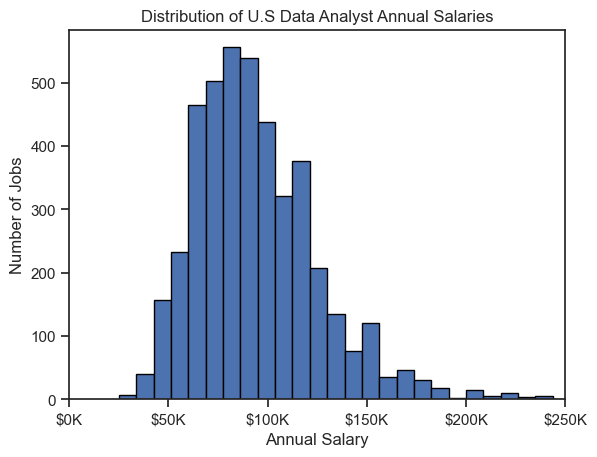

In [17]:
df2_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()

df2_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0,250000) # change the upper litmit value of the x axis

# Format tick value of x-axis like this example: $150K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# Add other chart elements
plt.title('Distribution of U.S Data Analyst Annual Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Annual Salary')

- And this is the new version using the mighty Seaborn:

Text(0.5, 12.44444444444443, 'Annual Salary')

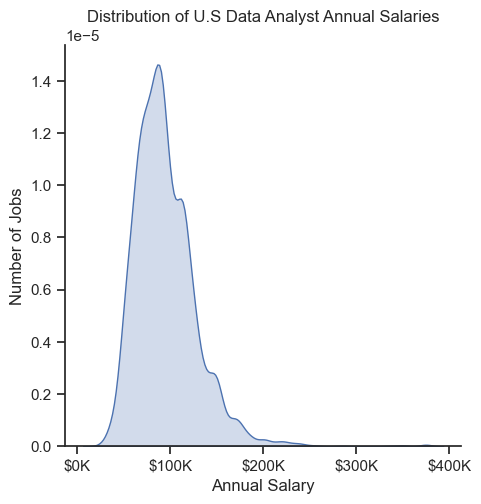

In [24]:
sns.set_theme(style='ticks')
sns.displot(
    data=df2_DA_US['salary_year_avg'],
    kind= 'kde',
    fill = True

)

# Format tick value of x-axis like this example: $150K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# Add other chart elements
plt.title('Distribution of U.S Data Analyst Annual Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Annual Salary')

6. Now we try doing the Box Plot with Seaborn

- This is the old version:

C:\Users\Pham Duc Toan\AppData\Local\Temp\ipykernel_6700\2623206888.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_df_list, labels= job_titles, vert=False,)


(0.0, 600000.0)

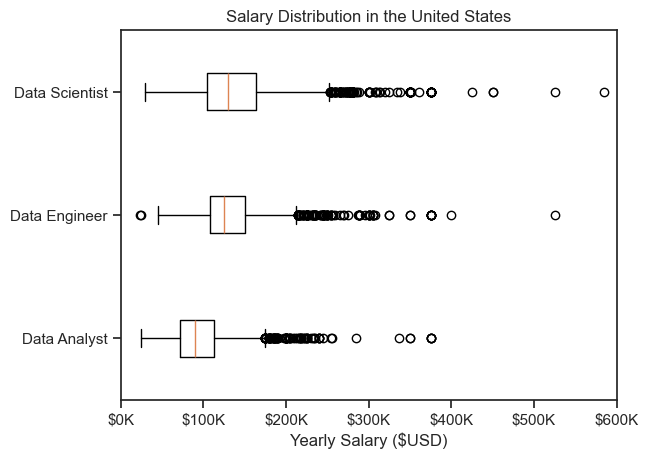

In [26]:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to appropriate the job titles 
# only jobs in the US
df3_DA_US = df[
    (df['job_title_short'].isin(job_titles)) & # df.series.isin() filter only 3 jobs in the list
    (df['job_country'] == 'United States')
    ].copy()

# drop NaN values
df3_DA_US = df3_DA_US.dropna(subset=['salary_year_avg'])

# list comprehesion
job_df_list = [df3_DA_US[df3_DA_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

# create the box plot
plt.boxplot(job_df_list, labels= job_titles, vert=False,) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

# get the current ax a.k.a the current plot
ax = plt.gca()

# format the major tick label
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# set the limit value of the x-axis
ax.set_xlim(0,600000)

- This is the Seaborn version:

(0.0, 600000.0)

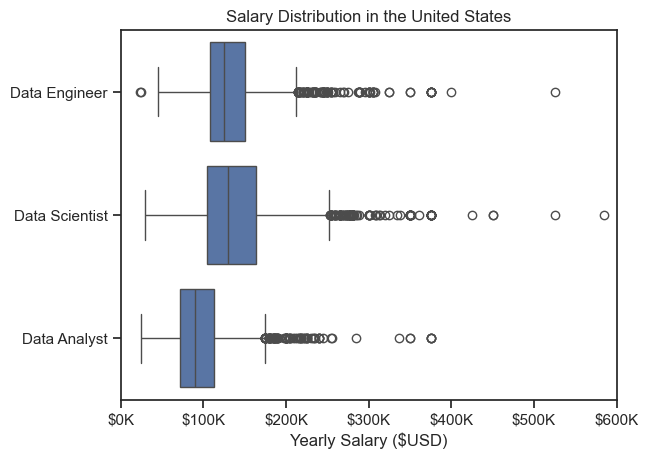

In [31]:


sns.boxplot(
    data = df3_DA_US,
    x= 'salary_year_avg',
    y = 'job_title_short'
)

# add chart elements
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
# get the current ax a.k.a the current plot
ax = plt.gca()

# format the major tick label
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# set the limit value of the x-axis
ax.set_xlim(0,600000)